# Обучение без учителя

unsupervised learning — задача машинного обучения без целевого признака, когда взаимосвязи между объектами алгоритмы находят самостоятельно. Выбор алгоритма зависит от типа задачи.

Обучение без учителя (англ. unsupervised learning) — задача машинного обучения без целевого признака, когда взаимосвязи между объектами алгоритмы находят самостоятельно. Выбор алгоритма зависит от типа задачи.
Изучение типов задач вы начнёте с кластеризации, в которой нужно выявить похожие объекты и объединить их в группы. Решить эту задачу поможет алгоритм k-средних, который вы освоите.
Затем познакомитесь с задачей поиска аномалий, в которой нужно найти объекты, непохожие на большинство других. Для её решения вы научитесь применять изоляционный лес и метод ближайших соседей.

Кластеризация — объединение похожих объектов в группы, или кластеры. Кластеризацию также называют кластерным анализом или сегментацией.

<img src="./pict/1.png"  
  width="600"
/>

В большинстве методов кластеризации схожесть или различие объектов определяется расстоянием между ними. Чем дальше объекты друг от друга, тем меньше сходства и наоборот. 

В бизнесе кластеризация помогает:
- сегментировать пользователей или товары. Такая задача тесно связана с рекомендательными системами.
- выявлять мошенников по нетипичному поведению: например, накрутка кликов или лайков в соцсетях.

# Алгоритм k-средних

Рассмотрим ключевое понятие алгоритма — центроид, или центр кластера. От степени близости к конкретному центру зависит, в какой кластер попадёт объект. У каждого кластера центроид свой, а вычисляется он как среднее арифметическое объектов кластера.

K-средних сегментирует объекты пошагово, поэтому это итеративный алгоритм. Разберём, как  он работает для заданного числа кластеров k:
1. Каждому объекту алгоритм случайным образом присваивает номер кластера — от 1 до k.
2. Пока кластеры объектов не перестанут меняться, алгоритм повторяет итерацию из двух шагов:
    - вычисляет центроид каждого кластера;
    - каждому объекту присваивает номер нового кластера, центроид которого расположен ближе всего к объекту.

Другим условием остановки алгоритма может быть выполнение максимального количества итераций `max_iter`. Этот параметр разберём позднее.

Проиллюстрируем работу алгоритма. В начале его запуска объекты раскрашены случайным образом. Разные цвета обозначают номера кластеров. После итерации алгоритма объекты одного цвета объединяются, а у кластеров появляются явные границы.

<img src="./pict/2.png"  
  width="600"
/>
<img src="./pict/3.png"  
  width="587"
/>

cреднее значение векторов `xj` — это произведение суммы всех векторов на число `1/N`, где N — количество векторов. Таким же способом вычисляется значение центроида `μ`:

<img src="./pict/4.png"  
  width="800"
/>

где первая координата полученного вектора — это сумма первых координат всех векторов, вторая — сумма вторых координат и далее до  n

Вернёмся к нашей задаче Riga estate. Для её решения пригодятся сегменты аренды:
- Дешевый: одногокмнатные квартиры с ценой 300 евро, площадь 45 квадратных метра
- Доступный: двухкомнатные квартиры с ценой 600 евро, площадь 65 квадратных метра
- Дорогой: четырехкомнатные квартиры с ценой 900 евро, площадь 100 квадратных метра




Признаки будем считать приближёнными: это лишь предположение отдела маркетинга. Они нужны, чтобы подсказать алгоритму, где искать кластеры. Значения этих признаков передадим на вход k-средних, чтобы задать начальные центроиды — это опциональный параметр. В задачах сравним обученную без этого параметра модель и модель с начальными центроидами. 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

from pandas.errors import SettingWithCopyWarning


# warnings.filterwarnings("ignore", category=RuntimeWarning) 
# warnings.filterwarnings("ignore", category=UserWarning) 
# warnings.filterwarnings("ignore", category=FutureWarning) 
# warnings.simplefilter("ignore", category=SettingWithCopyWarning) 
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format

np.set_printoptions(precision=3, suppress=True)

In [2]:
df = pd.read_csv('./data/data_from_sslv.csv')

lat_centr = 56.951502201912355
lon_centr = 24.113306982205742
df['distance'] = np.sqrt(abs(lat_centr**2 - df['len']**2) + abs(lon_centr**2 - df['lon']**2))


centers = np.array([[1.2, 45, 300], [1.2, 65, 600], [0.1, 200, 2000]])

In [3]:
data = df[['distance','area','price_eur']]

In [4]:
# без указания кластера
model2 = KMeans(n_clusters=3, random_state=12345)
model2.fit(data)

print("Центроиды кластеров:")

arr_centrs = model2.cluster_centers_.tolist()
arr_centrs.sort(key=lambda row: row[2], reverse=False)
print(np.asarray(arr_centrs))

Центроиды кластеров:
[[   2.103   40.639  279.327]
 [   1.577   69.885  662.454]
 [   1.415  116.933 1770.   ]]


In [5]:
# с указанием начальных центроидов
model1 = KMeans(n_clusters=3, random_state=12345, init=centers)
model1.fit(data)

print("Центроиды кластеров для модели с начальными центроидами:")
arr_centrs = model1.cluster_centers_.tolist()
arr_centrs.sort(key=lambda row: row[2], reverse=False)
print(np.asarray(arr_centrs))

Центроиды кластеров для модели с начальными центроидами:
[[   2.1     40.686  279.939]
 [   1.597   70.582  686.171]
 [   1.172  128.273 1950.   ]]


Центроиды «бежали со всех ног» — лишь бы попасть в другое место. И попали.

# Целевая функция

В задачах обучения с учителем функция потерь показывает расхождение между предсказанием и правильным ответом. Когда разметки нет, о потерях говорить некорректно: неизвестно, какие ответы верные. Чтобы оценить качество модели в задачах обучения без учителя, нужна целевая функция.

Прежде чем перейти к определению целевой функции, повторим задачу обучения с учителем. Она формулируется так: найти параметры модели, при которых значение функции потерь на обучающей выборке минимально. Функция потерь — это частный случай целевой функции. Нас также интересует поиск её минимального значения, обучающая выборка есть.

Рассмотрим задачу алгоритма `k-средних`. Нужно распределить объекты таким образом, чтобы расстояние между ними внутри одного кластера (внутрикластерное расстояние) было минимальным. Целевая функция алгоритма определяется как сумма внутрикластерных расстояний, а задача обучения состоит в минимизации этой суммы. 

Вычислим целевую функцию метода k-средних, но сперва заменим центроид для N объектов на центроид кластера в этой формуле

<img src="./pict/4.png"  
  width="800"
/>

То есть центроид каждого кластера `μk` вычисляется как среднее по всем объектам кластера:

<img src="./pict/5.png"  
  width="800"
/>

где 
- `Ck`  — число точек в кластере;
- `x` — объекты, то есть векторы размером n;
- `∈` — означает принадлежность объекта к кластеру.

Чтобы для каждого объекта найти ближайший центроид и присвоить ему номер нужного кластера, от объекта до центроида каждого кластера вычисляется евклидово расстояние `d2`

Повторим: это корень из суммы квадратов разностей координат. Затем из таких расстояний выбирается минимальное.

Формула записывается так:

<img src="./pict/6.png"  
  width="800"
/>

Значение `k`, при котором достигается минимум, и будет номером ближайшего кластера. 

Когда объекту присвоен номер ближайшего кластера `Ck`, можно переходить к расчёту внутрикластерного расстояния. Оно вычисляется как сумма квадратов расстояний от каждого объекта кластера `Ck` до центроида `μk`:

<img src="./pict/7.png"  
  width="700"
/>

В начале работы алгоритма номера кластеров объектам присвоены случайно, а внутрикластерное отклонение большое: то есть все точки перемешаны, фактически кластеров нет. В конце работы алгоритма все объекты с одинаковым номером кластера объединены, и уже заметны границы кластера. 

Итоговая целевая функция алгоритма вычисляется как сумма внутрикластерных отклонений:

<img src="./pict/8.png"  
  width="700"
/>

In [6]:
model1 = KMeans(n_clusters=3, random_state=12345)
model1.fit(data)

print("Целевая функция:")
print(round(model1.inertia_/10**6,1))

model2 = KMeans(n_clusters=3, init=centers, random_state=12345)
model2.fit(data)

print("Целевая функция модели с начальными центроидами:")
print(round(model2.inertia_/10**6,1))

Целевая функция:
10.8
Целевая функция модели с начальными центроидами:
10.9


Значение целевой функции для модели с начальными центроидами выше. Внутрикластерное расстояние больше: эти объекты держат дистанцию. Выясним, почему.

# Локальный минимум

`Mы получили два значения целевой функции. Причём больше значение у модели с начальными центроидами. Разберём, почему так получилось и что с этим делать.`

Бежать к маркетологам выяснять причину бессмысленно. Может, дело в RuntimeWarning? Всё-таки блокировка предупреждения до добра не довела. 

Блокировка вывода предупреждений `filterwarnings()` скрывает сообщение о том, что количество запусков алгоритма `n_init` с начальными центроидами стало равно единице.

`При каждом запуске алгоритма целевая функция получается минимальной для конкретного стартового набора объектов кластера. Такой минимум называется локальным.`

В нашей задаче это значение 7.6. При запуске на другом стартовом наборе значение функции может стать иным и будет новый локальный минимум. 

Параметр `n_init` по умолчанию равен `10`. Алгоритм запускается 10 раз с разными начальными кластерами. Из всех локальных минимумов выбирается наименьший. В нашей задаче это значение 6.3.

Подытожим. Целевая функция потерь с начальными центроидами получилась больше, потому что алгоритм запускался всего один раз. При 10-кратном запуске случайно удалось найти начальные центроиды лучше.

Разберём на примере ещё один параметр — `max_iter`, определяющий количество итераций алгоритма. Чем их больше, тем ближе к локальному минимуму мы подойдём. 

Перед вами результаты двух запусков алгоритма на синтетических данных с параметром `max_iter=1`. Данные сгенерированы как два облака точек. Заранее известно, что это два кластера. На графиках отмечены начальные центроиды: они-то и повлияли на распределение точек по кластерам.

Слева начальные центроиды попали примерно в центры кластеров. Справа начальные центроиды уже смещены от кластеров, сами кластеры также сдвинулись. Целевая функция больше значения слева.

<img src="./pict/9.png"  
  width="1000"
/>

С увеличением числа итераций до четырёх значения целевой функции становятся одинаковыми:

<img src="./pict/10.png"  
  width="1000"
/>

Максимальное число итераций по умолчанию равно 300 — в большинстве задач этого достаточно.

`Как связана целевая функция с параметрами max_iter и n_init? - Чем больше параметр n_init, тем меньше целевая функция.`

# Визуализация

Для визуализации данных о пользователях сервиса построим график методом pairplot из библиотеки seaborn

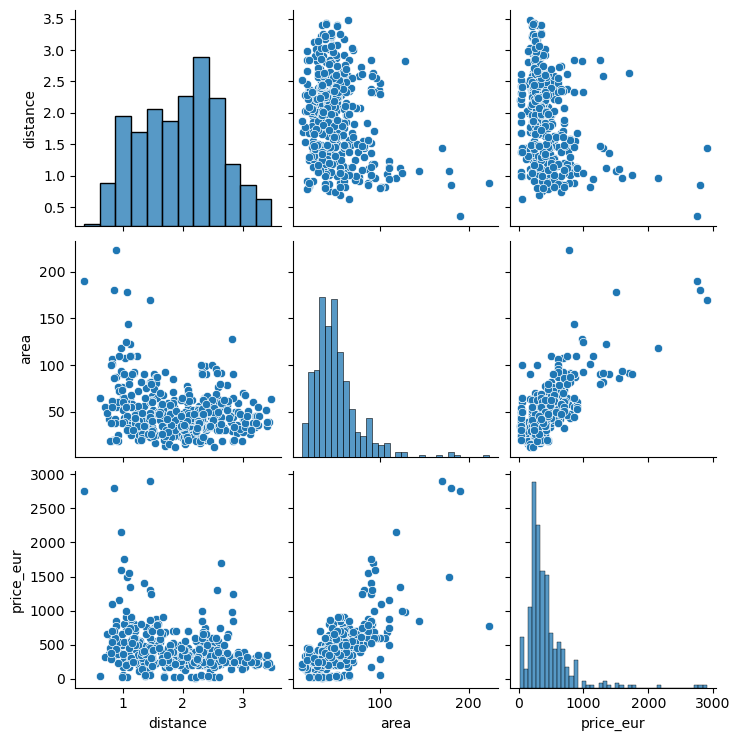

In [7]:
import seaborn as sns
sns.pairplot(data, diag_kind='hist') 

На графике изображены скопления точек — это будущие кластеры. Что интересного заметили?

Добавим заливку кластеров в график модели, обученной без начальных центроидов. Правила заливки задаёт параметр hue. Он принимает на вход массив из строковых переменных. Поэтому в массив строк переведём номера кластеров. А чтобы добавить на график центроиды, дадим им названия. Затем все данные объединим.

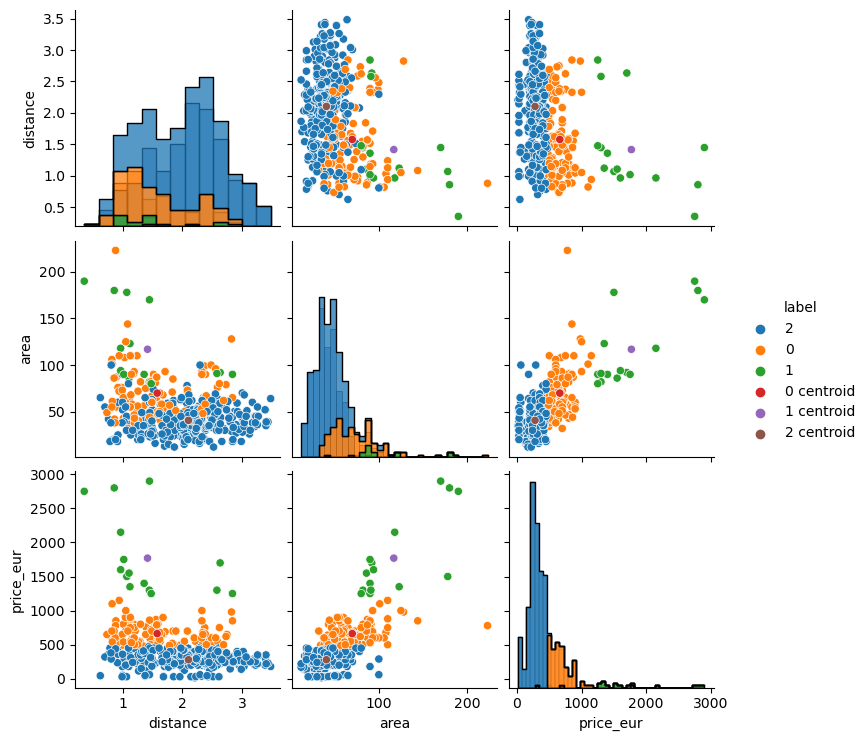

In [8]:
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

# Добавление столбца с номером кластера
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']

# Сброс индекса понадобится дальше
data_all = pd.concat([data, centroids], ignore_index=True)

# Построение графика
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
pairgrid.map_diag(sns.histplot, multiple="stack", element="step", color=".3")

С базовым и продвинутым сегментами сложнее. Чтобы определить подходящие им кластеры, на график добавим начальные центроиды дополнительным слоем. Для этого сохраним соответствующий графику объект — PairGrid:

Дополнительные значения для построения графика передадим через атрибут `data`:

In [9]:
centroids_init = pd.DataFrame([[1.2, 45, 300], [1.2, 65, 600], [0.1, 200, 2000]], \
                             columns=data.drop(columns=['label']).columns)
centroids_init['label'] = 4
data['label'] = model.labels_.astype(str)
centroids_init

,distance,area,price_eur,label
0,1.20,45,300,4
1,1.20,65,600,4
2,0.10,200,2000,4


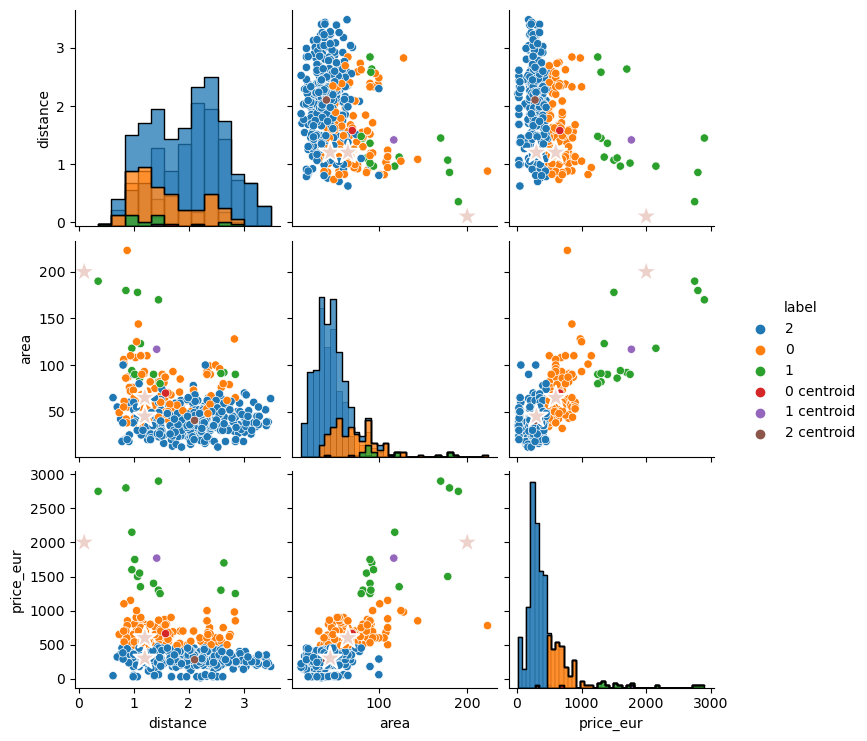

In [10]:
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
pairgrid.map_diag(sns.histplot, multiple="stack", element="step", color=".3")
pairgrid.data = centroids_init 
pairgrid.map_offdiag(sns.scatterplot, s=300, marker='*', palette='Red')

Обратите внимание на последний столбец `label`. В каждой строке столбца указано значение `4`. Функция этого столбца формальна: метод `map_offdiag` библиотеки `seaborn` требует, чтобы в дополнительных данных присутствовал столбец, который передаётся параметру `hue`. Если не создать такой столбец, произойдёт ошибка. 

Добавить в дополнительный столбец `label` лучше такое значение, которое в основном столбце `label` не встречалось, например, `4`. 
Вызовем ещё один метод — `map_offdiag`. Он строит данные из `pairgrid.data` на проекциях вне диагоналей. Параметр `func` определяет тип графика, `s` — размер , `marker` — форму точек, а  `palette` — цветовую палитру

# Оптимальное число кластеров

Целевая функция метода `k-средних` уменьшается с увеличением количества кластеров. Если у каждого объекта кластер отдельный, то внутрикластерное расстояние равно нулю. Так мы минимизируем целевую функцию, но смысла в такой кластеризации нет: кластеров по сути не будет.

В нашей задаче признаков только три. Поэтому мы получили 6 парных проекций графика `pairplot`, дающих полное представление о данных. В других задачах признаков могут быть десятки и сотни, и графиком `pairplot` их охватить уже сложно. В результате работы алгоритма они-то и стали кластерами. 

## Метод локтя

Данные не всегда разделены чётко. Поэтому есть другой способ поиска числа кластеров — метод локтя. Своё название получил неслучайно: по форме его график напоминает согнутую в локте руку. Оптимальное количество кластеров определяется условным «локтем». Чтобы построить график метода, нужно составить список из значений целевой функции для разного количества кластеров: от 1 до 10 (реже 20). Для этого обучим модель несколько раз и сохраним значения целевой функции каждой модели в список distortion:

In [11]:
data.drop('label', axis=1, inplace=True)

In [12]:
distortion = []
K = range(1, 20)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(data)
    distortion.append(model.inertia_) 

Отобразим полученный список на графике:

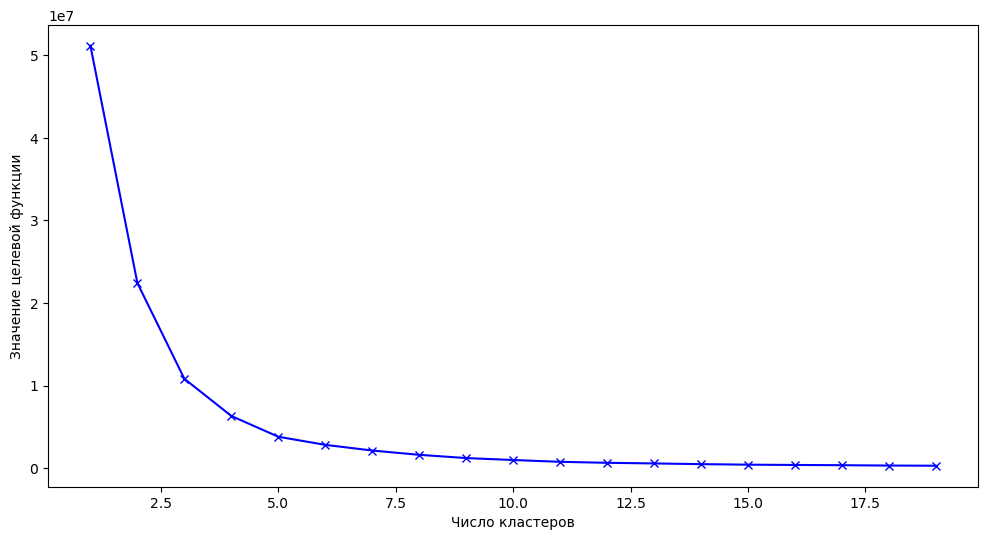

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show() 

Это и есть график метода `локтя`: значение целевой функции сначала резко уменьшается, а затем выходит на плато. Этот момент перехода как раз отражает оптимальное количество кластеров.

На этом графике плато начинается после шестого кластера. Причём неплохие результаты также показывают пятый и четвертый кластеры: после них скачок вниз целевой функции не очень большой. 

Перейдём к нашей задаче и посчитаем значения целевой функции для моделей, обученных на разном количестве кластеров.

In [14]:
# Обучение модели для 6-х кластеров
model = KMeans(n_clusters=6, random_state=12345)
model.fit(data)
clusters = model.cluster_centers_.round().tolist()
clusters.sort(key=lambda row: row[2], reverse=False)

print("Типичные пользователи сегментов для 6 кластеров:")
print(np.asarray(clusters))

Типичные пользователи сегментов для 6 кластеров:
[[   2.   37.  189.]
 [   2.   43.  335.]
 [   2.   58.  513.]
 [   2.   75.  766.]
 [   1.  101. 1400.]
 [   1.  164. 2650.]]


In [15]:
# Обучение модели для 5-х кластеров
model = KMeans(n_clusters=5, random_state=12345)
model.fit(data)
clusters = model.cluster_centers_.round().tolist()
clusters.sort(key=lambda row: row[2], reverse=False)

print("Типичные пользователи сегментов для 5 кластеров:")
print(np.asarray(clusters))

Типичные пользователи сегментов для 5 кластеров:
[[   2.   38.  222.]
 [   2.   49.  417.]
 [   2.   74.  730.]
 [   1.  101. 1400.]
 [   1.  164. 2650.]]


In [16]:
# Обучение модели для 4-х кластеров
model = KMeans(n_clusters=4, random_state=12345)
model.fit(data)
clusters = model.cluster_centers_.round().tolist()
clusters.sort(key=lambda row: row[2], reverse=False)

print("Типичные пользователи сегментов для 4 кластеров:")
print(np.asarray(clusters))

Типичные пользователи сегментов для 4 кластеров:
[[   2.   41.  279.]
 [   2.   69.  652.]
 [   1.  101. 1400.]
 [   1.  164. 2650.]]


# Интерпретация результата

Посмотрим на результаты работы алгоритма для 5 кластеров:

In [72]:
data = df[['distance','area','price_eur']]

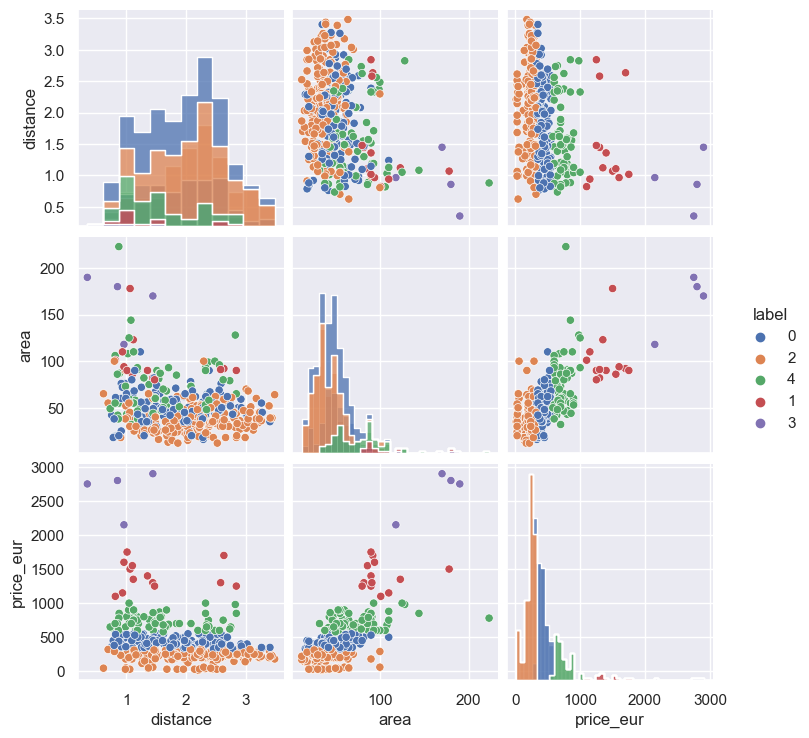

In [73]:
model = KMeans(n_clusters=5, random_state=12345, n_init=100)
model.fit(data)
 
data['label'] = model.labels_.astype(str)

clusters = model.cluster_centers_.round()
clusters[np.apply_along_axis(lambda row: row[2], 0, clusters).argsort()]

# clusters['centroid'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid', '4 centroid']
# data_all = pd.concat([data, clusters], ignore_index=True)

# Построение графика
pairgrid = sns.pairplot(data, hue='label', diag_kind='hist')
pairgrid.map_diag(sns.histplot, multiple="stack", element="step", color=".3")

In [79]:
clusters = model.cluster_centers_.round(2)
clusters[np.apply_along_axis(lambda row: row[2], 1, clusters).argsort()]

array([[   2.16,   38.31,  225.74],
       [   1.88,   49.45,  421.84],
       [   1.6 ,   73.77,  729.56],
       [   1.49,  100.54, 1400.  ],
       [   0.91,  164.5 , 2650.  ]])

<div class='alert alert-warning'>
Домашне задание 
</div>

    1. Выгрузить данные из SS.LV по продажам автомобилей
    2. Выделить частовстречаемые brand машин, оставить не более 4
    3. Обучите модель с n-кластерами (в зависимости от количества brand) на данных без brand. 
    4. Сравнить результат
Параметры для построения классов выбераем сами, для важных классов используем ONE-HOT encoding 

# Примеры работы алгоритмов кластеризации из документации пакета scikit-learn

<img src="./pict/17.png"  
  width="1700"
/>

# Поиск аномалий 

anomalies или outliers — это объекты с «ненормальным» поведением, то есть отклоняющимся от общего тренда.

Выбросы указывают на проблему в данных или на что-то нестандартное. Например, обнаружение подозрительных банковских операций: Oleksandr из Riga, радующий себя только шавермой по выходным, неожиданно «купил» очень дорогой смартфон в Минске. 

Или прогнозирование природных аномалий: если можно было предсказать тёплую зиму, то Наташа сэкономила бы деньги на покупке нового пуховика.

Поскольку выбросы непредсказуемы, примеров аномальных объектов при обучении мало или вовсе нет.

Электротехнический завод накапливает данные о рабочих процессах. Укажите задачи поиска аномалий:

1. Изменить параметры сборки, чтобы сократить время производства единицы продукции.
2. Находить в технике возможные дефекты.
3. Выявлять нарушения сотрудниками техники безопасности.
4. Выдавать предупреждение, когда скорость конвейерной ленты начинает превышать допустимое значение.

# Диаграмма размаха

Представим, что значения признака — это мешок чисел. Нужно найти числа, сильно отличающиеся от остальных. Для этого сравним их с медианой на boxplot, или «ящике с усами». 

Повторим обозначения. Верхняя и нижняя границы ящика — `третья` и `первая квартиль` (75% и 25% значений). Посередине обозначена медиана (50% значений). `«Усы»` простираются вверх и вниз от границ ящика на расстояние, равное `1.5 межквартильным размахам` (IQR). `Выбросы указаны за пределами усов` — максимумом и минимумом.

<img src="./pict/11.webp"  
  width="1000"
/>

Межквартильный размах IQR вычисляется так:

<img src="./pict/12.png"  
  width="800"
/>

Формула нижней границы ящика L такая:

<img src="./pict/13.png"  
  width="800"
/>

Формула верхней границы R:

<img src="./pict/14.png"  
  width="800"
/>

Чем больше коэффициент `k`, тем меньше объектов будут считаться выбросами. Обычно его указывают равным `1.5`.

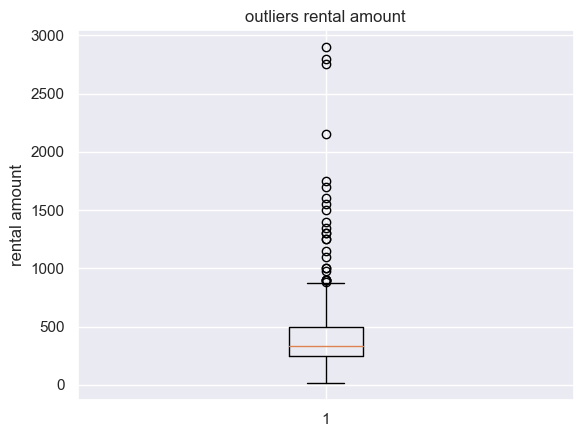

In [85]:
plt.boxplot(df['price_eur'].values)
plt.ylabel('rental amount')
plt.title("outliers rental amount")
plt.show() 

Диаграмма даёт информацию обо всех выбросах. Она хранится в записи `"fliers"` внутри объекта `boxplot`. Вызовом функции `get_data()` из объектов получим числа. Нужные значения отделены индексами.

outliers rental amount:  25


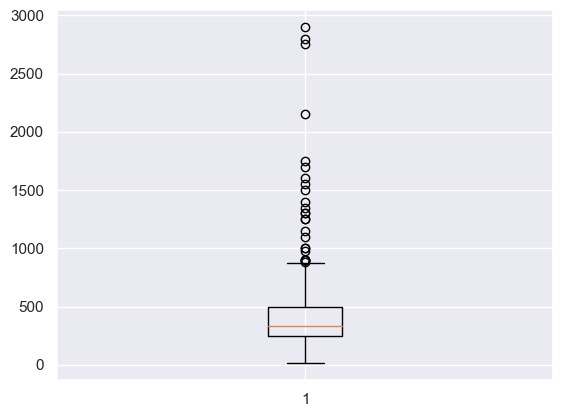

In [88]:
boxplot = plt.boxplot(df['price_eur'].values)
outliers = list(boxplot["fliers"][0].get_data()[1])
print("outliers rental amount: ", len(outliers)) 

,Unnamed: 0,district,data_street,rooms,area,price_eur,period,cur_floor,total_floor,lift,seria,house_type,facilities,len,lon,wifi,distance
82,82,центр,Рупниецибас 25,3,82.00,1300,30,3,6,1,Нов.,Панельно-кирпичный,"Балкон, Лоджия, Парковочное место",56.97,24.10,0,1.45
92,92,центр,Антонияс 16a,4,118.00,2150,30,7,7,1,Нов.,Кирпично-панельный,Балкон,56.96,24.11,0,0.96
103,103,центр,Стабу 31,4,110.00,880,30,3,6,0,Дов. дом,Кирпичный,Балкон,56.96,24.13,0,1.13
111,111,центр,Стрелниеку 2a,5,178.00,1500,30,2,6,1,Дов. дом,Каменный,NaN,56.96,24.11,0,1.07
129,129,Межапарк,Эзермалас 13,4,128.00,980,30,2,5,1,Нов.,Панельно-кирпичный,"Сауна, Парковочное место",57.00,24.17,0,2.83


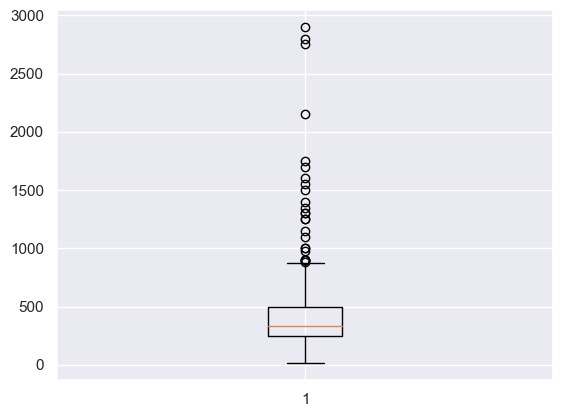

In [91]:
boxplot = plt.boxplot(df['price_eur'].values)

outliers = list(boxplot["fliers"][0].get_data()[1])
df_outliers = df[df["price_eur"].isin(outliers)] 

df_outliers.head()

# Изоляционный лес

Перейдём к многомерным данным. Познакомимся с другим алгоритмом поиска аномалий — `isolation forest`.

Это `ансамблевый метод`. Поэтому, как и в случайном лесу, его оценки строятся на усреднённых оценках множества деревьев решений. В узлах деревьев находятся решающие правила. Они определяют, к какой ветви отнести объект. 

`Изоляционный лес` основан на том, что аномальные объекты можно изолировать от остальных небольшим количеством решающих правил.

<img src="./pict/15.png"  
  width="800"
/>

In [95]:
from sklearn.ensemble import IsolationForest

In [137]:
data = df[['price_eur','area','distance']]

isolation_forest = IsolationForest(n_estimators=100, random_state=7575) 
isolation_forest.fit(data) 

estimator = isolation_forest.fit_predict(data) 
data['outliers'] = estimator

estimator = isolation_forest.fit_predict(data) 
outliers = list(estimator[estimator == -1])


display(data.loc[data['outliers']==-1].head())
display(len(outliers))

,price_eur,area,distance,outliers
8,850,144.00,1.08,-1
24,600,99.00,2.37,-1
52,300,52.00,3.40,-1
67,50,52.00,1.00,-1
71,870,87.00,1.56,-1


86

# KNN для поиска аномалий

`k-Nearest Neighbors`(KNN) работает так: каждый объект датасета принимает за вектор и выбросы ищет в многомерном пространстве. Чем дальше объект от своих соседей, тем выше вероятность его аномальности. 
    
Класс `KNN()` находится в библиотеке `PyOD` (англ. Python toolkit for detecting outlying objects, «инструмент для поиска аномалий в Python»). Импортируем его из модуля `pyod.models.knn`:

In [140]:
from pyod.models.knn import KNN 

Вызовом функции `fit()` обучим модель на выборке:

In [150]:
data = df[['price_eur','area','distance']]

In [142]:
model = KNN()
model.fit(data) 

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

Когда модель обучена, можно перейти к поиску аномалий в наборе данных. Вызовем функцию `predict()`:

In [149]:
predictions = model.predict(data) 

Функция `predict()` вернёт список, где «1» означает `аномалию`, а «0» — её `отсутствие`.

In [157]:
knn = KNN()
knn.fit(data) 
estimation_knn = knn.fit_predict(data)

isolationforest = IsolationForest(n_estimators=100, random_state=7575)
estimator_iforest = isolation_forest.fit_predict(data) 

data['outliers_knn'] = estimation_knn
data['outliers_isolationfores'] = estimator_iforest

data['outliers_total'] = np.where((data['outliers_knn']==1) & (data['outliers_isolationfores']==-1), 1, 0)

In [163]:
print('outliers_knn:            ', len(data[data['outliers_knn']==1]))

print('outliers_isolationfores: ', len(data[data['outliers_isolationfores']==-1]))

print('outliers total:          ', data['outliers_total'].sum())

outliers_knn:             45
outliers_isolationfores:  91
outliers total:           45
